# Pymaceuticals Inc.
---

### Analysis


 

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
import numpy as np

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single dataset
mouse_df = pd.merge(mouse_metadata, study_results, on="Mouse ID", how="outer")

# Display the data table for preview
mouse_df.head()

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1


In [2]:
# Checking the number of mice.
mouse_df["Mouse ID"].unique()
number_of_mice = len(mouse_df["Mouse ID"].unique())
print(f"There are {number_of_mice} mice.")

There are 249 mice.


In [3]:
# Getting the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 
duplicate = mouse_df[mouse_df.duplicated(["Mouse ID", "Timepoint"], keep="first")]
duplicate["Mouse ID"]

909    g989
911    g989
913    g989
915    g989
917    g989
Name: Mouse ID, dtype: object

In [4]:
# Optional: Get all the data for the duplicate mouse ID. 
duplicate_data = mouse_df.loc[mouse_df["Mouse ID"] == "g989"]
duplicate_data

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
908,g989,Propriva,Female,21,26,0,45.000000,0
909,g989,Propriva,Female,21,26,0,45.000000,0
910,g989,Propriva,Female,21,26,5,48.786801,0
911,g989,Propriva,Female,21,26,5,47.570392,0
912,g989,Propriva,Female,21,26,10,51.745156,0
913,g989,Propriva,Female,21,26,10,49.880528,0
914,g989,Propriva,Female,21,26,15,51.325852,1
915,g989,Propriva,Female,21,26,15,53.442020,0
916,g989,Propriva,Female,21,26,20,55.326122,1
917,g989,Propriva,Female,21,26,20,54.657650,1


In [5]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
clean_mouse_df = mouse_df.drop(labels=duplicate_data.index, axis=0, inplace=False)
clean_mouse_df.reset_index(drop=True)
clean_mouse_df.head()

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1


In [6]:
# Checking the number of mice in the clean DataFrame.
clean_mouse_df["Mouse ID"].unique()
number_of_mice = len(clean_mouse_df["Mouse ID"].unique())
print(f"There are {number_of_mice} mice.")

There are 248 mice.


## Summary Statistics

In [7]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# Use groupby and summary statistical methods to calculate the following properties of each drug regimen: 
# mean, median, variance, standard deviation, and SEM of the tumor volume. 
mean_tumor_volume = clean_mouse_df.groupby("Drug Regimen").mean()["Tumor Volume (mm3)"]
median_tumor_volume = clean_mouse_df.groupby("Drug Regimen").median()["Tumor Volume (mm3)"]
variance_tumor_volume = clean_mouse_df.groupby("Drug Regimen").var()["Tumor Volume (mm3)"]
tumor_stdev = clean_mouse_df.groupby("Drug Regimen").std()["Tumor Volume (mm3)"]
tumor_SEM = clean_mouse_df.groupby("Drug Regimen").sem()["Tumor Volume (mm3)"]

# Assemble the resulting series into a single summary DataFrame.
summary_df = pd.concat([mean_tumor_volume, median_tumor_volume, variance_tumor_volume, tumor_stdev, tumor_SEM], axis=1)
summary_df.columns = ["Average Tumor Volume", "Median Tumor Volume", "Tumor Volume Variance", "Tumor Volume Std. Dev.", "Tumor Volume Std. Err."]
summary_df

,Average Tumor Volume,Median Tumor Volume,Tumor Volume Variance,Tumor Volume Std. Dev.,Tumor Volume Std. Err.
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


In [8]:
# Generate a summary statistics table of mean, median, variance, standard deviation, 
# and SEM of the tumor volume for each regimen
# Using the aggregation method, produce the same summary statistics in a single line.
stats_table = clean_mouse_df.groupby("Drug Regimen").agg(['mean', 'median', 'var', 'std', 'sem'])["Tumor Volume (mm3)"]
styles = [dict(selector="caption", props=[("text-align", "center"), ("font-size", "150%"), ("color", 'black')])]
stats_table = stats_table.style.set_caption("Tumor Volume (mm3)").set_table_styles(styles)
stats_table

,mean,median,var,std,sem
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


## Bar and Pie Charts

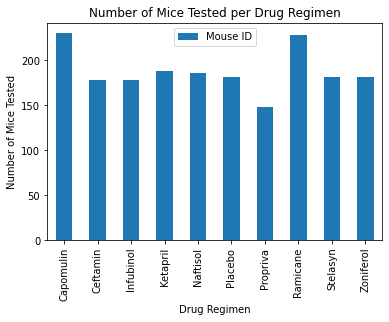

In [9]:
# Generate a bar plot showing the total number of timepoints for all mice tested for each drug regimen using Pandas.
bar0 = pd.concat([clean_mouse_df.groupby(["Drug Regimen"]).count()["Mouse ID"]], axis=1)
bar0.plot(kind='bar', title="Number of Mice Tested per Drug Regimen")
plt.ylabel("Number of Mice Tested")
plt.show()


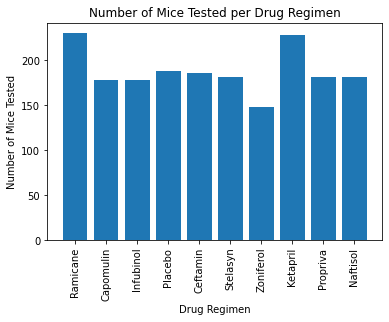

In [10]:
# Generate a bar plot showing the total number of timepoints for all mice tested for each drug regimen using pyplot.
x1 = clean_mouse_df["Drug Regimen"].unique()
y1 = clean_mouse_df.groupby(["Drug Regimen"]).count()["Mouse ID"]

bar1 = plt.bar(x1, y1)
plt.xlabel("Drug Regimen")
plt.xticks(rotation=90)
plt.ylabel("Number of Mice Tested")
plt.title("Number of Mice Tested per Drug Regimen")
plt.show()


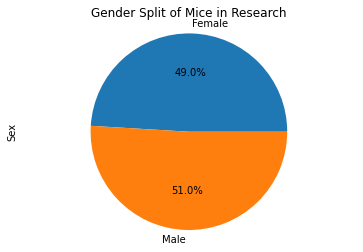

In [11]:
# Generate a pie plot showing the distribution of female versus male mice using Pandas
pie0 = clean_mouse_df.groupby("Sex").count()["Mouse ID"]
pie0.plot(kind='pie', y="Sex", autopct="%1.1f%%", title="Gender Split of Mice in Research")
plt.ylabel("Sex")
plt.axis("equal")
plt.show()


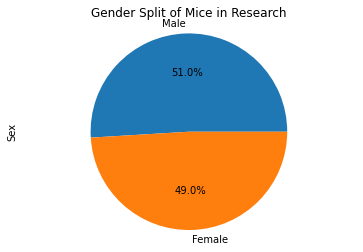

In [12]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot
pie0 = clean_mouse_df.groupby("Sex").count()["Mouse ID"]
labels = ["Male", "Female"]
sizes = [pie0["Male"], pie0["Female"]]

plt.pie(sizes, labels=labels, autopct="%1.1f%%")
plt.title("Gender Split of Mice in Research")
plt.axis("equal")
plt.ylabel("Sex")
plt.show()


## Quartiles, Outliers and Boxplots

In [13]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin

# Start by getting the last (greatest) timepoint for each mouse
# Capomulin
capo = clean_mouse_df.loc[clean_mouse_df["Drug Regimen"] == "Capomulin", :]
last_capo = capo.groupby("Mouse ID").max()["Timepoint"]
last_capo_df = pd.DataFrame(last_capo)
last_capo_df

# Merge this group df with the original DataFrame to get the tumor volume at the last timepoint
last_capo_merge = pd.merge(last_capo_df, clean_mouse_df, on=("Mouse ID", "Timepoint"), how="left")
last_capo_merge.reset_index
last_capo_merge.head()

,Mouse ID,Timepoint,Drug Regimen,Sex,Age_months,Weight (g),Tumor Volume (mm3),Metastatic Sites
0,b128,45,Capomulin,Female,9,22,38.982878,2
1,b742,45,Capomulin,Male,7,21,38.939633,0
2,f966,20,Capomulin,Male,16,17,30.485985,0
3,g288,45,Capomulin,Male,3,19,37.074024,1
4,g316,45,Capomulin,Female,22,22,40.159220,2


In [14]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin

# Start by getting the last (greatest) timepoint for each mouse
# Ramicane
rami = clean_mouse_df.loc[clean_mouse_df["Drug Regimen"] == "Ramicane", :]
last_rami = rami.groupby("Mouse ID").max()["Timepoint"]
last_rami_df = pd.DataFrame(last_rami)
last_rami_df

# Merge this group df with the original DataFrame to get the tumor volume at the last timepoint
last_rami_merge = pd.merge(last_rami_df, clean_mouse_df, on=("Mouse ID", "Timepoint"), how="left")
last_rami_merge.reset_index
last_rami_merge.head()

,Mouse ID,Timepoint,Drug Regimen,Sex,Age_months,Weight (g),Tumor Volume (mm3),Metastatic Sites
0,a411,45,Ramicane,Male,3,22,38.407618,1
1,a444,45,Ramicane,Female,10,25,43.047543,0
2,a520,45,Ramicane,Male,13,21,38.810366,1
3,a644,45,Ramicane,Female,7,17,32.978522,1
4,c458,30,Ramicane,Female,23,20,38.342008,2


In [15]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin

# Start by getting the last (greatest) timepoint for each mouse
# Infubinol
infu = clean_mouse_df.loc[clean_mouse_df["Drug Regimen"] == "Infubinol", :]
last_infu = infu.groupby("Mouse ID").max()["Timepoint"]
last_infu_df = pd.DataFrame(last_infu)
last_infu_df

# Merge this group df with the original DataFrame to get the tumor volume at the last timepoint
last_infu_merge = pd.merge(last_infu_df, clean_mouse_df, on=("Mouse ID", "Timepoint"), how="left")
last_infu_merge.reset_index
last_infu_merge.head()

,Mouse ID,Timepoint,Drug Regimen,Sex,Age_months,Weight (g),Tumor Volume (mm3),Metastatic Sites
0,a203,45,Infubinol,Female,20,23,67.973419,2
1,a251,45,Infubinol,Female,21,25,65.525743,1
2,a577,30,Infubinol,Female,6,25,57.031862,2
3,a685,45,Infubinol,Male,8,30,66.083066,3
4,c139,45,Infubinol,Male,11,28,72.226731,2


In [16]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin

# Start by getting the last (greatest) timepoint for each mouse
# Ceftamin
ceft = clean_mouse_df.loc[clean_mouse_df["Drug Regimen"] == "Ceftamin", :]
last_ceft = ceft.groupby("Mouse ID").max()["Timepoint"]
last_ceft_df = pd.DataFrame(last_ceft)
last_ceft_df

# Merge this group df with the original DataFrame to get the tumor volume at the last timepoint
last_ceft_merge = pd.merge(last_ceft_df, clean_mouse_df, on=("Mouse ID", "Timepoint"), how="left")
last_ceft_merge.reset_index
last_ceft_merge.head()

,Mouse ID,Timepoint,Drug Regimen,Sex,Age_months,Weight (g),Tumor Volume (mm3),Metastatic Sites
0,a275,45,Ceftamin,Female,20,28,62.999356,3
1,b447,0,Ceftamin,Male,2,30,45.000000,0
2,b487,25,Ceftamin,Female,6,28,56.057749,1
3,b759,30,Ceftamin,Female,12,25,55.742829,1
4,f436,15,Ceftamin,Female,3,25,48.722078,2


In [31]:
# Put treatments into a list for for loop (and later for plot labels)
drugs_list = ["Capomulin", "Ramicane", "Infubinol", "Ceftamin"]

# Dataframe with relevant drugs and tumor volume at last timepoint for each mouse 
drugs_df = pd.concat([last_capo_merge, last_rami_merge, last_infu_merge, last_ceft_merge], axis=0)

# Create empty list to fill with tumor vol data (for plotting)
tumor_volume_data = []

# Calculate the IQR and quantitatively determine if there are any potential outliers. 
outlier_count = 0
n_mice = drugs_df.groupby("Drug Regimen").count()["Mouse ID"]
for drug in drugs_list:
    number_of_mice = n_mice[drug]
    mice_index = list(range(0, number_of_mice, 1))
    quartiles = drugs_df.loc[drugs_df["Drug Regimen"] == drug]["Tumor Volume (mm3)"].quantile([0.25, 0.5, 0.75]).round(2)
    lowerq = quartiles[0.25].round(2)
    upperq = quartiles[0.75].round(2)
    iqr = (upperq - lowerq).round(2)
    lower_bound = (lowerq - (1.5*iqr)).round(2)
    upper_bound = (upperq + (1.5*iqr)).round(2)
    outlier_value = []
    outlier_index = []
    
    # Locate the rows which contain mice on each drug and get the tumor volumes
    # add subset 
    # Determine outliers using upper and lower bounds 
    for i in mice_index:
        if drugs_df.loc[drugs_df["Drug Regimen"]==drug]["Tumor Volume (mm3)"][i] <= lower_bound:
            outlier_count += 1
            outlier_value.append(drugs_df.loc[drugs_df["Drug Regimen"]==drug]["Tumor Volume (mm3)"][i])
            outlier_index.append(drugs_df.loc[drugs_df["Drug Regimen"]==drug]["Mouse ID"][i])
        elif drugs_df.loc[drugs_df["Drug Regimen"]==drug]["Tumor Volume (mm3)"][i] >= upper_bound:
            outlier_count += 1
            outlier_value.append(drugs_df.loc[drugs_df["Drug Regimen"]==drug]["Tumor Volume (mm3)"][i])
            outlier_index.append(drugs_df.loc[drugs_df["Drug Regimen"]==drug]["Mouse ID"][i])
    print(f"{drug} potential outliers are: {outlier_value} of mouse {outlier_index}")

Capomulin potential outliers are: [] of mouse []
Ramicane potential outliers are: [] of mouse []
Infubinol potential outliers are: [36.321345799999996] of mouse ['c326']
Ceftamin potential outliers are: [] of mouse []


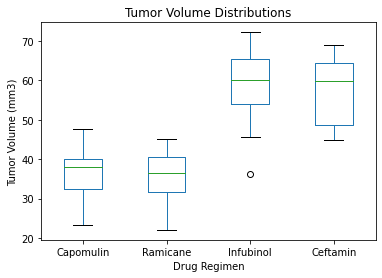

In [19]:
# Generate a box plot that shows the distrubution of the tumor volume for each treatment group.
tumor_data = pd.concat([last_capo_merge["Tumor Volume (mm3)"], last_rami_merge["Tumor Volume (mm3)"], last_infu_merge["Tumor Volume (mm3)"], last_ceft_merge["Tumor Volume (mm3)"]], axis=1)
tumor_data.columns = ["Capomulin", "Ramicane", "Infubinol", "Ceftamin"]
tumor_data.plot(kind="box", title="Tumor Volume Distributions")
plt.xlabel("Drug Regimen")
plt.xticks([1, 2, 3, 4], drugs_list)
plt.ylabel("Tumor Volume (mm3)")
plt.show()


## Line and Scatter Plots

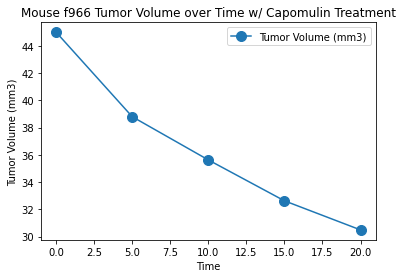

In [20]:
# Generate a line plot of tumor volume vs. time point for a mouse treated with Capomulin
cap_mouse_df = clean_mouse_df.loc[clean_mouse_df["Mouse ID"] == "f966", :]
cap_mouse_df.plot(kind="line", x="Timepoint", y="Tumor Volume (mm3)", marker="o", markersize=10)
plt.xlabel("Time")
plt.ylabel("Tumor Volume (mm3)")
plt.title("Mouse f966 Tumor Volume over Time w/ Capomulin Treatment")

plt.show()

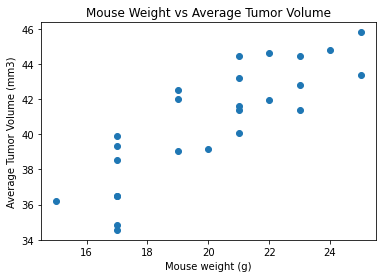

In [21]:
# Generate a scatter plot of average tumor volume vs. mouse weight for the Capomulin regimen
avg_tumor0 = clean_mouse_df.loc[clean_mouse_df["Drug Regimen"] == "Capomulin", :]
avg_tumor_vol = avg_tumor0.groupby("Mouse ID").mean()["Tumor Volume (mm3)"]
weight = avg_tumor0.groupby("Mouse ID").mean()["Weight (g)"] #Weight stays the same throughout the treatment 

plt.scatter(weight, avg_tumor_vol)
plt.xlabel("Mouse weight (g)")
plt.ylabel("Average Tumor Volume (mm3)")
plt.title("Mouse Weight vs Average Tumor Volume")
plt.show()

## Correlation and Regression

The correlation coefficient between mouse weight and average tumor volume is 0.8419


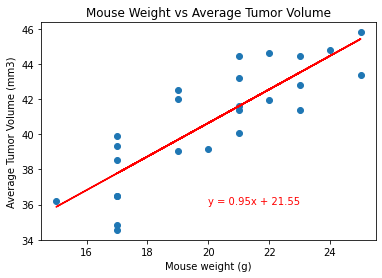

In [22]:
# Calculate the correlation coefficient and linear regression model 
# for mouse weight and average tumor volume for the Capomulin regimen
(slope, intercept, rvalue, pvalue, stderr) = st.linregress(weight, avg_tumor_vol)
regress_values = weight*slope + intercept
line_eq = f"y = {str(round(slope,2))}x + {str(round(intercept,2))}"

plt.scatter(weight, avg_tumor_vol)
plt.plot(weight, regress_values, "r-")
plt.annotate(line_eq, (20, 36), color="red")
plt.xlabel("Mouse weight (g)")
plt.ylabel("Average Tumor Volume (mm3)")
plt.title("Mouse Weight vs Average Tumor Volume")
print(f"The correlation coefficient between mouse weight and average tumor volume is {rvalue.round(4)}")
plt.show()